# Modelando un Sistema de ecuaciones diferenciales del sistema Musculo, Ingesta calorica y volumen de entrenamiento.

En el siguiente notebook desarrollo un modelo matemático  para simular el cuerpo humano en presencia de ejericios de fuerza, ofreciendo en el camino herramientas matemáticas para la maximización de entrenamientos con evidencia cientifica.



$dG/dt=k_1C(t)-k_2M(t)$ 


$dM/dt=k_3V(t)+k_4C(t)$

$dV/dt=k_7M(t)+V(t)+k_8C(t)$

$dF/dt=V(t)+k_9$

In [93]:
import pandas as pd
import numpy as np
from numpy import log10,log
import math as math

import matplotlib.pyplot as plt

#Calculando grasa corporal
Cintura=[132,126,127,127,126,126]
Cuello=[46,46,44,45.5,45,46]
altura=168
dif=[e1 - e2 for e1, e2 in zip(Cintura,Cuello)]
pcGrasa=495/(1.0324-0.19077*log10(dif)+0.15456*log10(altura))-450
#David D. Peterson, History of the U.S. Navy Body Composition Program, Military Medicine, 
#Volume 180, Issue 1, January 2015, Pages 91–96, https://doi.org/10.7205/MILMED-D-14-00266

$\%Grasa=\frac{495}{(1.0324-0.19077log(Cintura-Cuello)+0.15456*log(altura)}-450$

In [94]:
peso=[130.7,128.4,129.6,130.1,129.2,128.4]
Fechas=["Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto"]
Fecxas=[1,2,3,4,5,6]
#Calculando masa muscular neta y grasa neta en cuerpo
MMM=peso*(1-pcGrasa/100)
MG=peso*(pcGrasa/100)

In [95]:
Espalda=[140,142,143,145,139,146,]
#Calculando Metrica Phi 
phi=[e1/e2 for e1, e2 in zip(Espalda,Cintura)]
pF=[e5/1.618 for e5 in phi]
#La meta en el parametro Phi es llegar a la proporción Espalda/Cintura de 1.6 

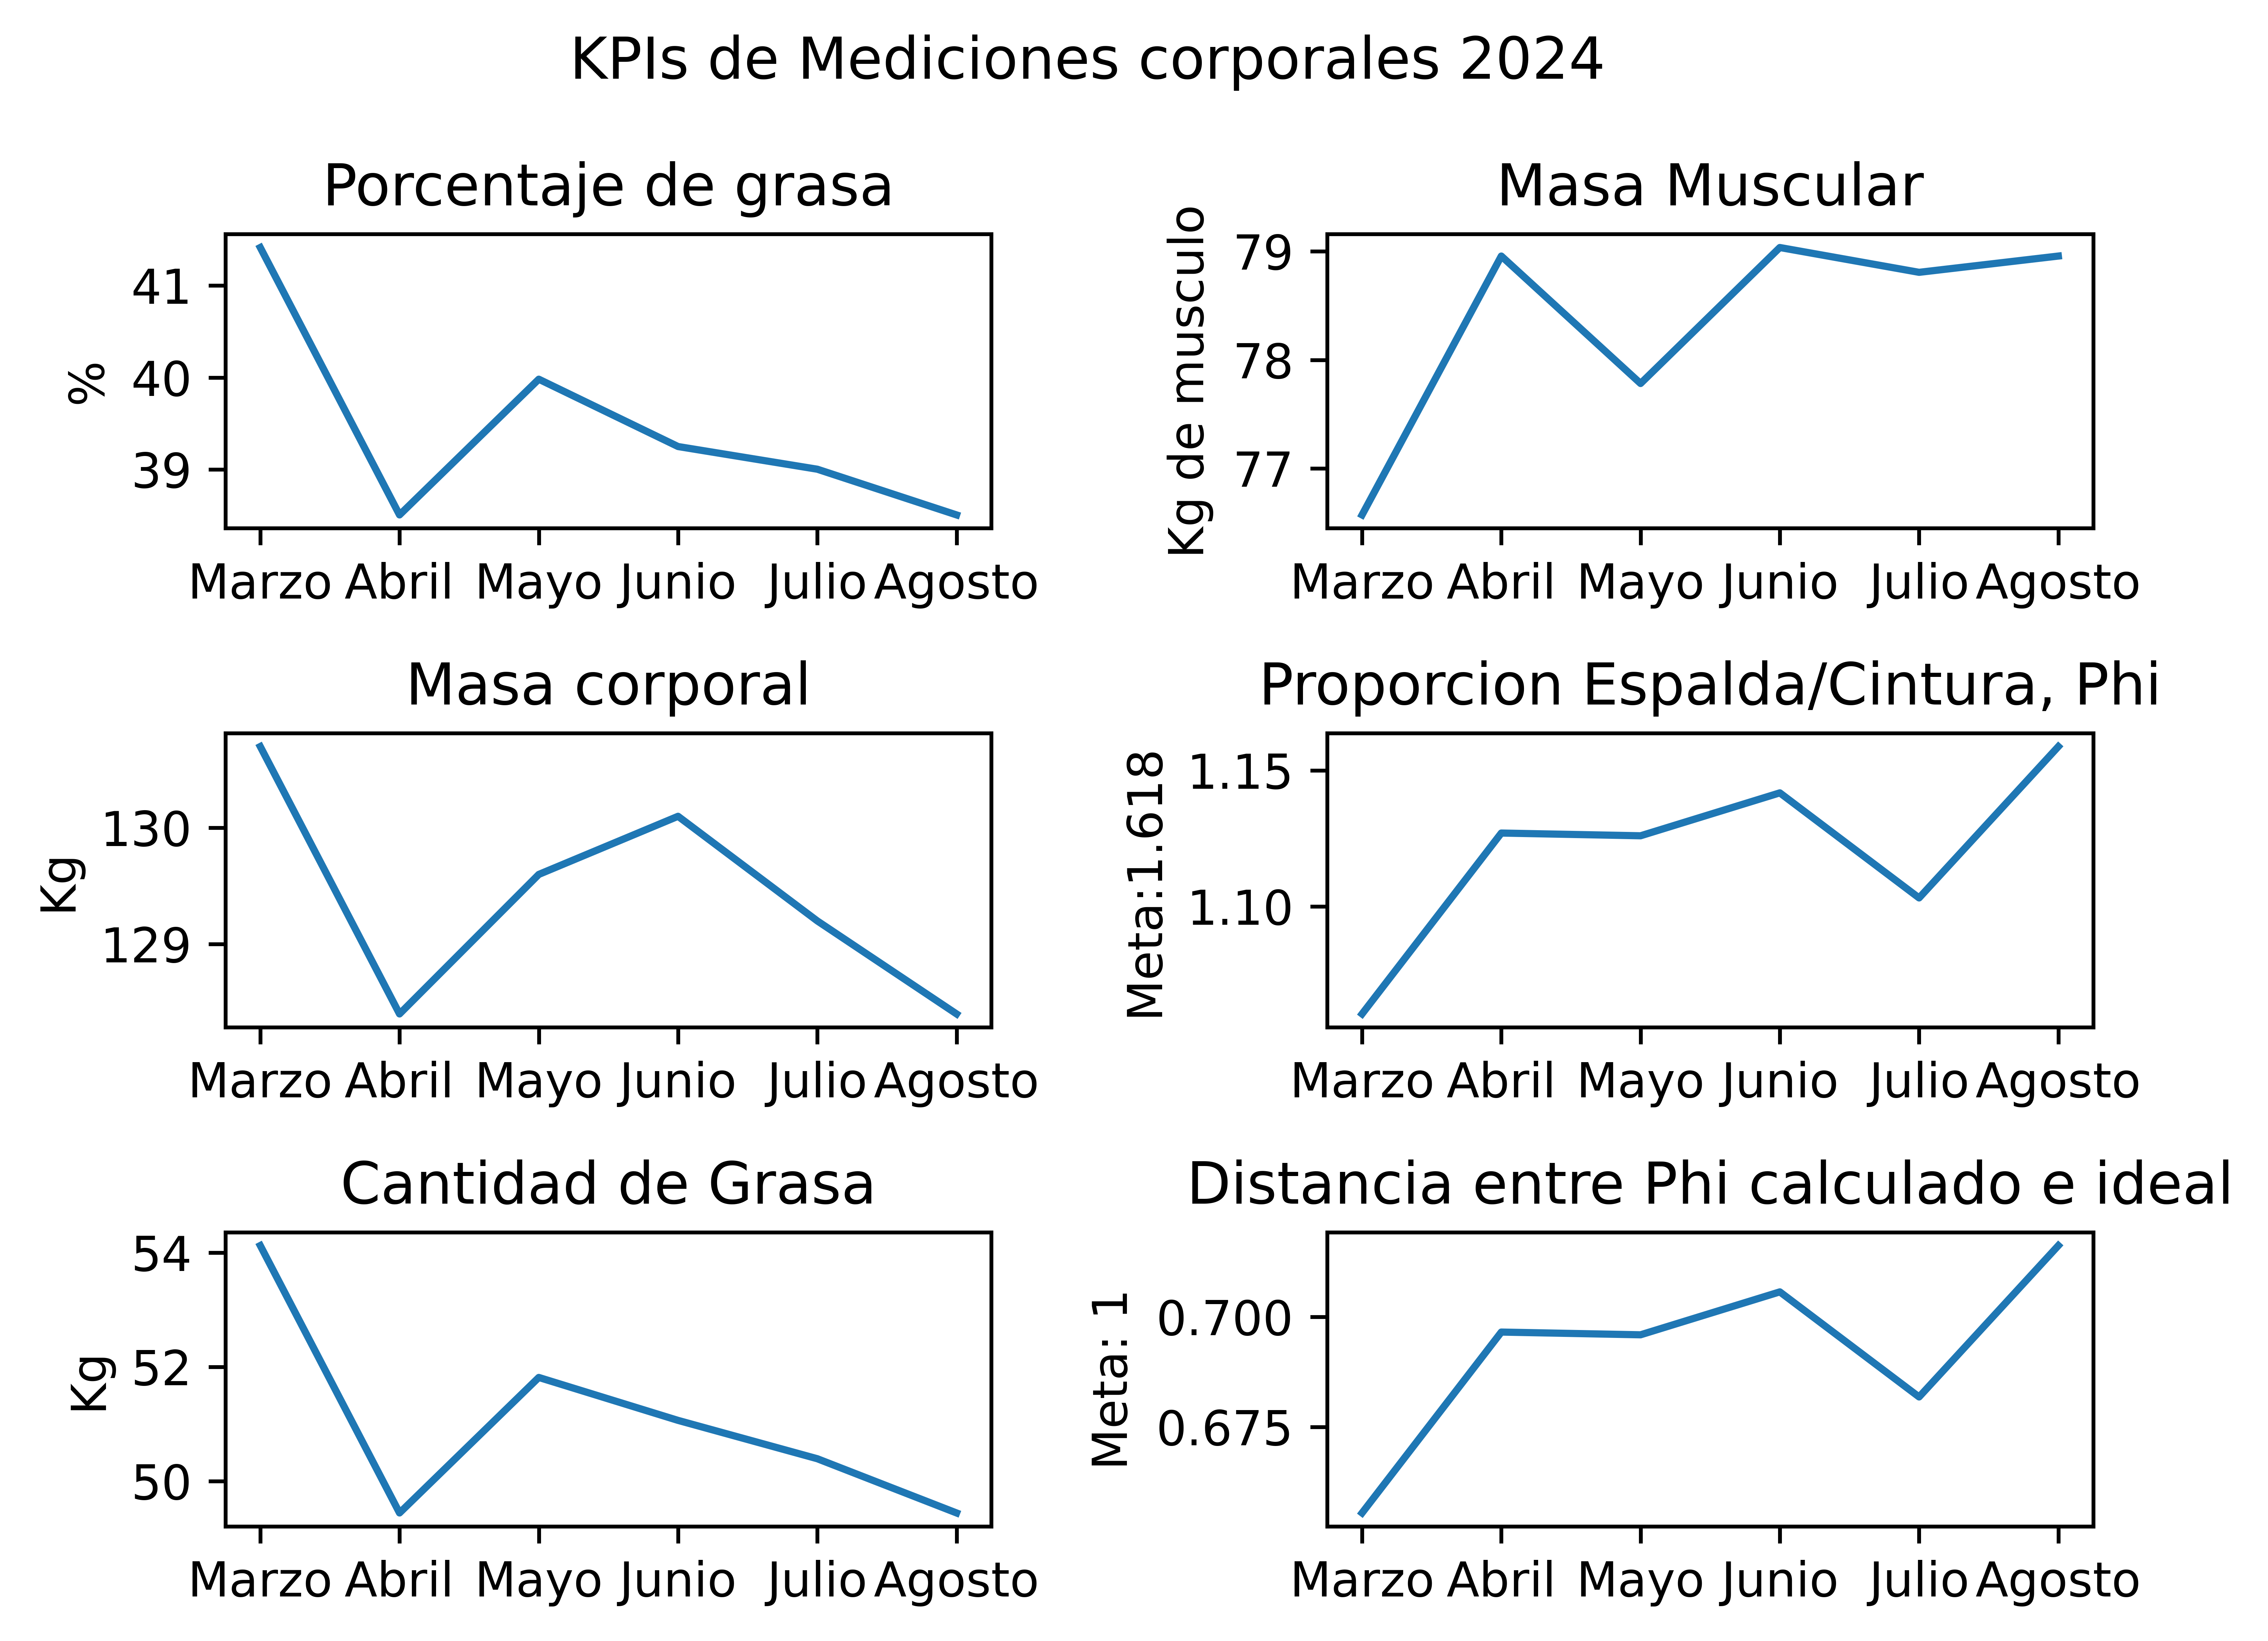

In [96]:

fig = plt.figure(dpi=1000)

fig.clf()


ax = fig.subplots(3,2)

ax[0,0].plot(Fechas, pcGrasa)
ax[0,0].set_ylabel('%')
ax[0,0].set_title('Porcentaje de grasa')

ax[1,0].plot(Fechas, peso)
ax[1,0].set_ylabel('Kg')
ax[1,0].set_title('Masa corporal')

ax[0,1].plot(Fechas, MMM)
ax[0,1].set_ylabel('Kg de musculo')
ax[0,1].set_title('Masa Muscular')

ax[1,1].plot(Fechas,phi)
ax[1,1].set_ylabel('Meta:1.618')
ax[1,1].set_title('Proporcion Espalda/Cintura, Phi')

ax[2,1].plot(Fechas,pF)
ax[2,1].set_ylabel('Meta: 1')
ax[2,1].set_title('Distancia entre Phi calculado e ideal')

ax[2,0].plot(Fechas,MG)
ax[2,0].set_ylabel('Kg')
ax[2,0].set_title('Cantidad de Grasa')
fig.suptitle("KPIs de Mediciones corporales 2024")

fig.tight_layout()


## Regresión lineal para la cantidad de grasa.


-0.6091612995687943 x+ 53.179882968648094


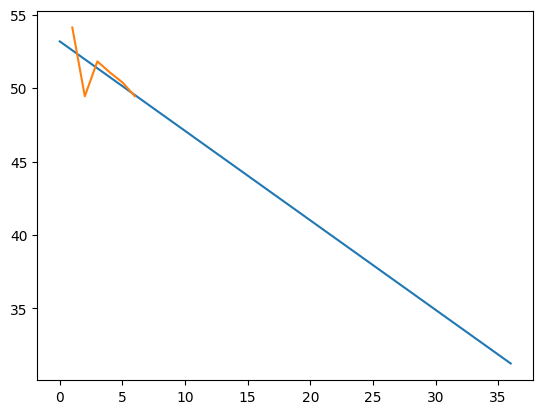

In [97]:


#Haciendo la regresión lineal
y=MG
xy=[e1*e2 for e1, e2 in zip(Fecxas,y)]
x2=[e1*e1 for e1 in Fecxas]
Sx2=sum(x2)
Sxy=sum(xy)
Sx=sum(Fecxas)
Sy=sum(y)

n=len(y)
my=sum(y)/n
mx=Sx/n

#obteniendo la pendiente de la recta
m=(n*Sxy-Sx*Sy)/(n*Sx2-(Sx)**2)
#obteniendo la intersección con el eje de la Y
b=my-m*mx


#plt.plot(Fecxas,log10(MG))
#Ecuación lineal que determina el porcentaje de grasa corporal en un momento dado x
print(1.0*m, "x+" , b)

#Graficando ecuación lineal y porcentaje de grasa.

x = np.linspace(0, 12*3, 25)
y =1.0*m*x+b


fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(Fecxas, MG)
plt.show()

In [98]:
##Despejando la ecuación lineal de porcentaje de grasa y dando aproximación
##Meta de porcentaje de grasa coporal
mpgc=50
x=(1.0*mpgc-b)/m
anyos=int(x/12)
meses=int(x%12)
print("Se alcanzará la meta en ", anyos, " años y ", meses, " meses")


Se alcanzará la meta en  0  años y  5  meses


## Regresión logaritmica para la cantidad de grasa

e^( -0.011716060912688352 x+ 3.973276753502019 )


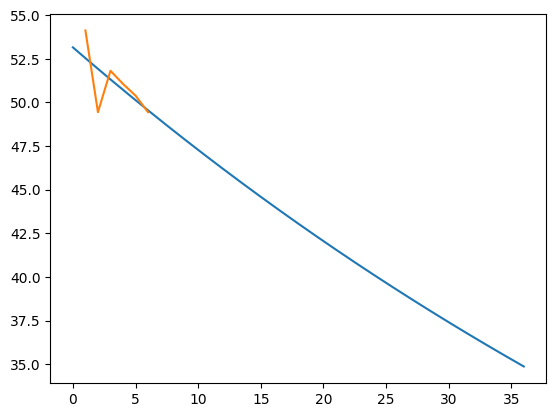

In [101]:

#Haciendo la regresión logaritmica
y=log(MG)
xy=[e1*e2 for e1, e2 in zip(Fecxas,y)]
x2=[e1*e1 for e1 in Fecxas]
Sx2=sum(x2)
Sxy=sum(xy)
Sx=sum(Fecxas)
Sy=sum(y)

n=len(y)
my=sum(y)/n
mx=Sx/n

#obteniendo la pendiente de la recta
m=(n*Sxy-Sx*Sy)/(n*Sx2-(Sx)**2)
#obteniendo la intersección con el eje de la Y
b=my-m*mx


#plt.plot(Fecxas,log10(MG))
#Ecuación lineal que determina el porcentaje de grasa corporal en un momento dado x
print("e^(",1.0*m, "x+" , b, ")")

#Graficando ecuación lineal y porcentaje de grasa.

x = np.linspace(0, 12*3, 25)
y =2.718281**(1.0*m*x+b)


fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(Fecxas, MG)
plt.show()

In [102]:
##Despejando la ecuación logaritmica de porcentaje de grasa y dando aproximación
##Meta de porcentaje de grasa coporal
mpgc=50
x=(log(1.0*mpgc)-b)/m
anyos=int(x/12)
meses=int(x%12)
print("Se alcanzará la meta en ", anyos, " años y ", meses, " meses")


Se alcanzará la meta en  0  años y  5  meses


## Graficando y modelando el volumen de entrenamiento por grupo muscular

In [103]:
from datetime import date
from datetime import datetime
from datetime import timedelta

df = pd.read_csv('grupomuscular.csv')

df.Fecha=[datetime.strptime(i,"%d/%m/%Y") for i in df.Fecha]

df=df.sort_values(by="Fecha")


hoy = datetime.now()
desde5meses=hoy-timedelta(days=150)
df=df[df.Fecha>desde5meses]
df.Fecha=[365*i.isocalendar()[0]+7*i.isocalendar()[1]+i.isocalendar()[2]-738500 for i in df.Fecha]

In [104]:
P=df[df.Gmuscular=="Pierna"]
H=df[df.Gmuscular=="Hombros"]
B=df[df.Gmuscular=="Brazo"]
G=df[df.Gmuscular=="Gluteo"]
C=df[df.Gmuscular=="Pecho"]
A=df[df.Gmuscular=="Abdomen"]
E=df[df.Gmuscular=="Espalda"]

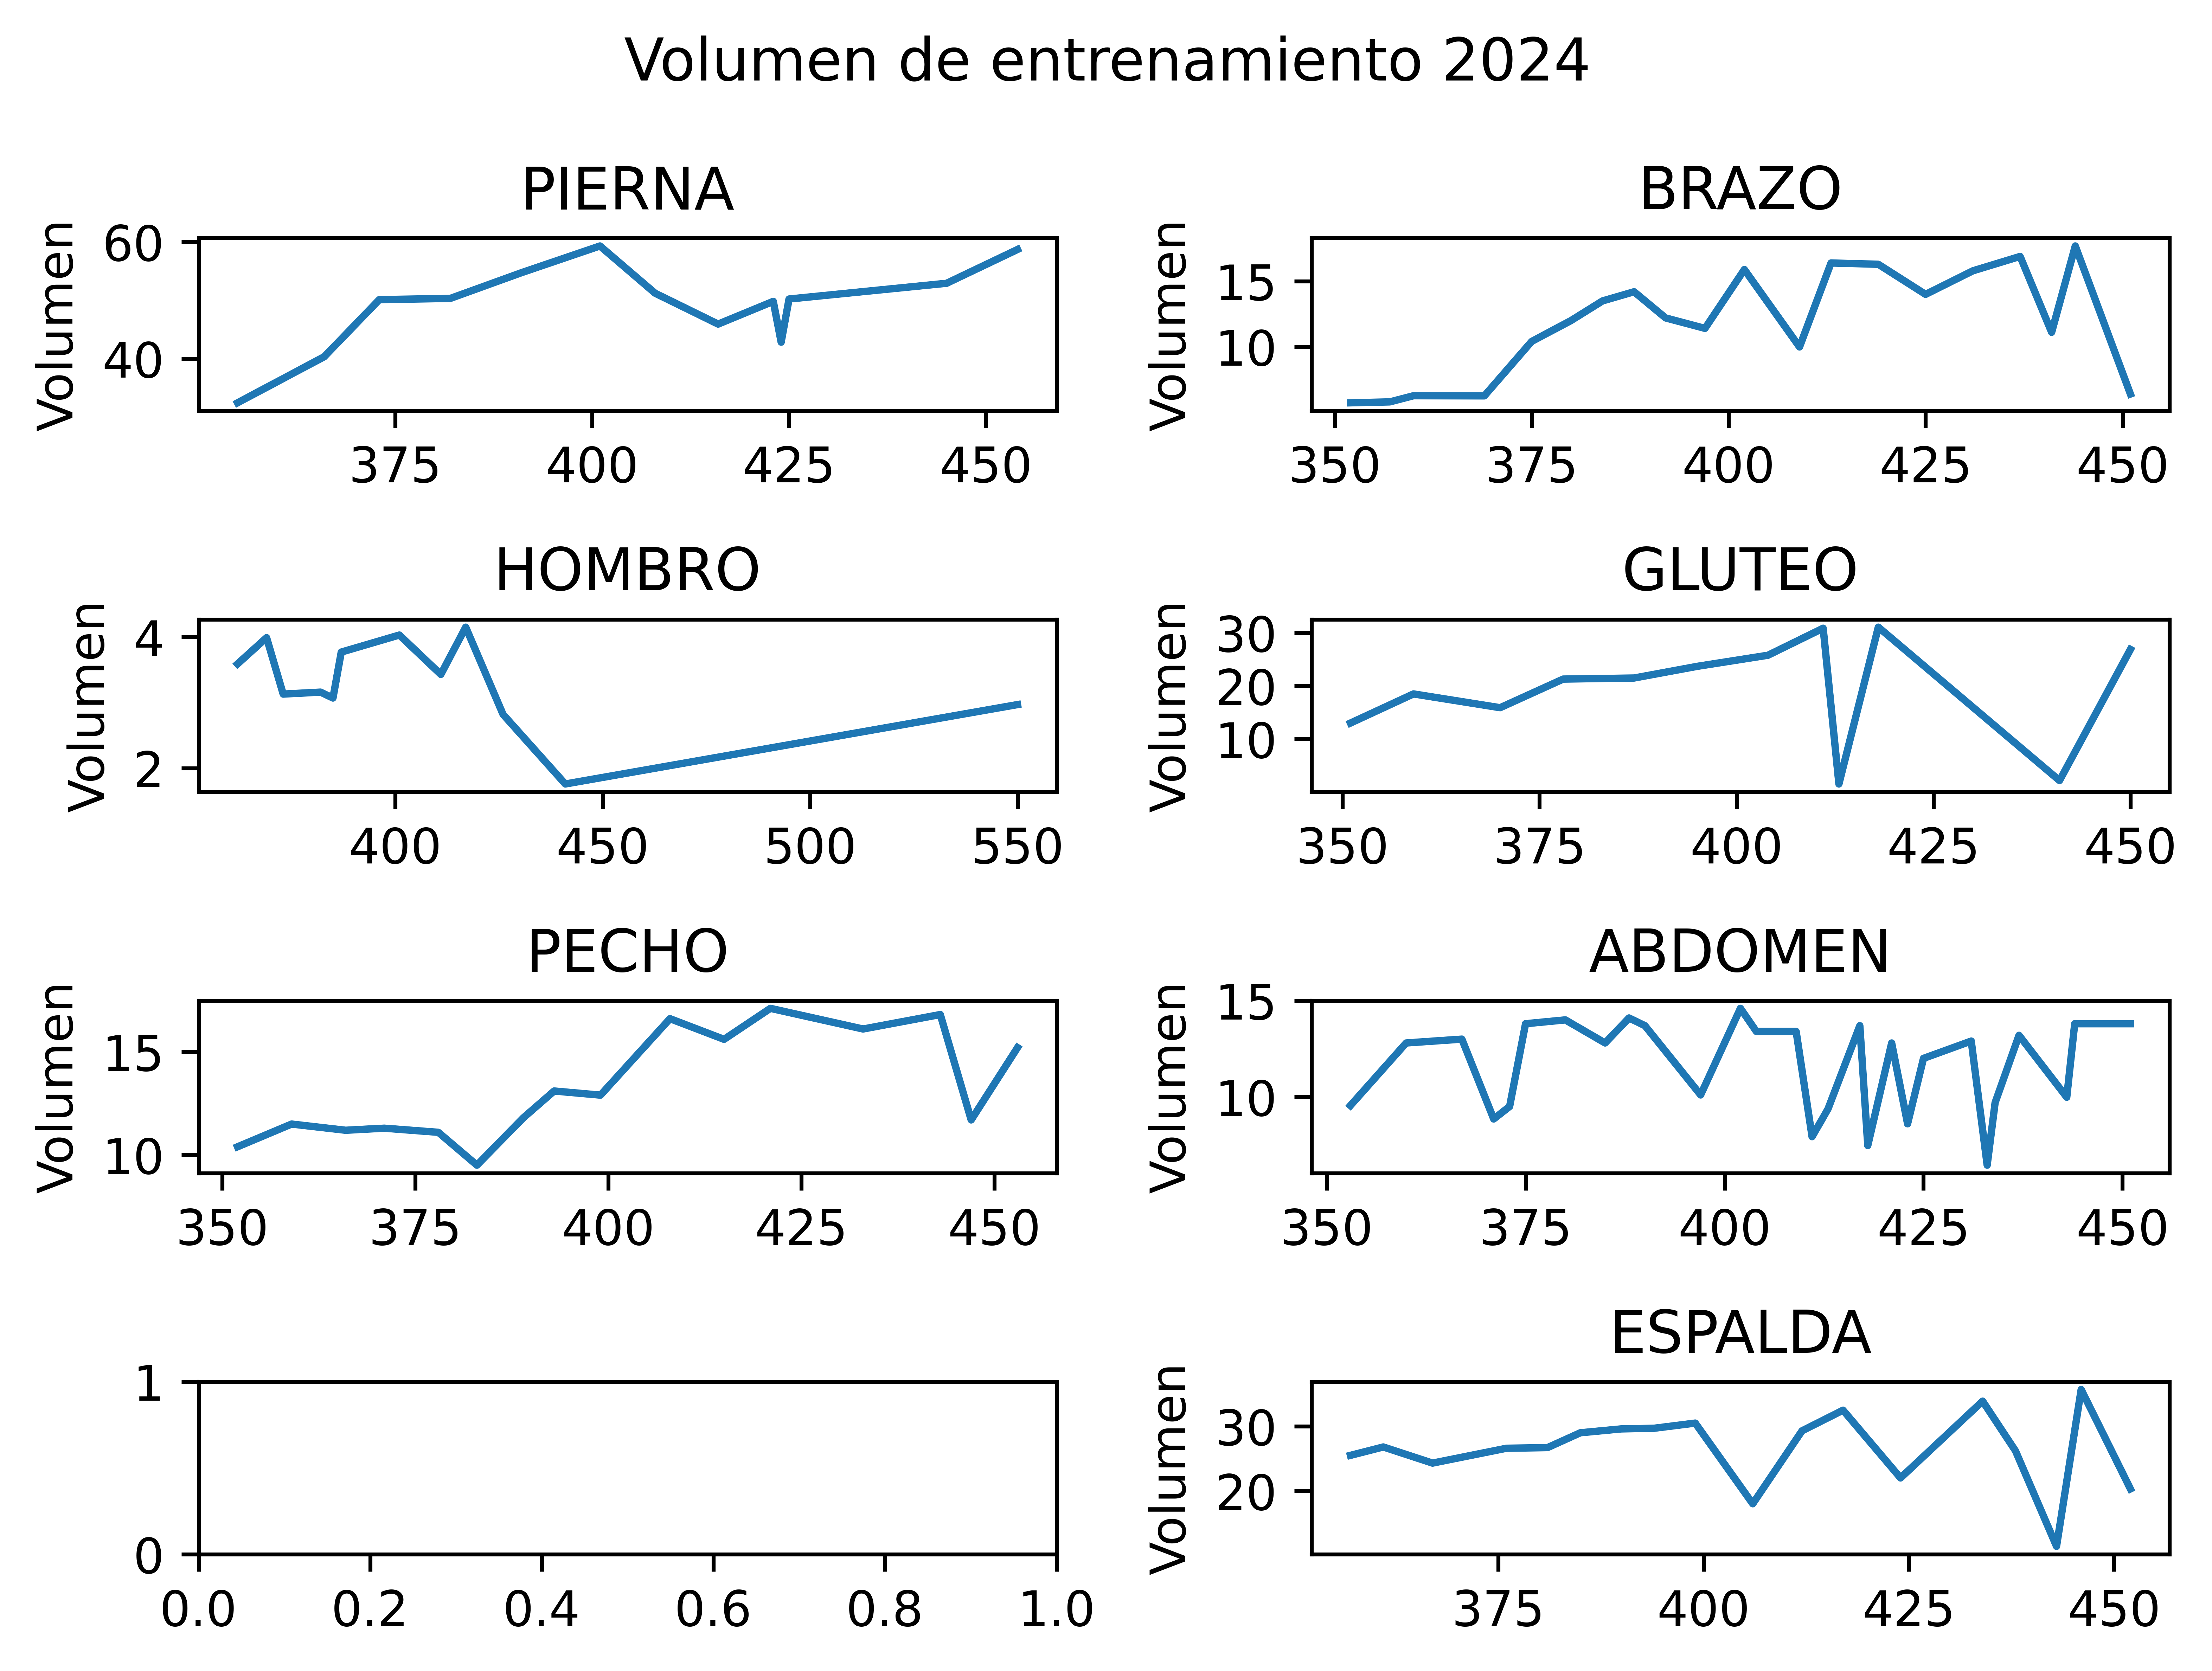

In [105]:
fig = plt.figure(dpi=1000)

fig.clf()


bx = fig.subplots(4,2)

bx[0,0].plot(P.Fecha.tolist(), P.Volumen.tolist())
bx[0,0].set_ylabel('Volumen')
bx[0,0].set_title('PIERNA')

bx[1,0].plot(H.Fecha.tolist(), H.Volumen.tolist())
bx[1,0].set_ylabel('Volumen')
bx[1,0].set_title('HOMBRO')

bx[0,1].plot(B.Fecha.tolist(), B.Volumen.tolist())
bx[0,1].set_ylabel('Volumen')
bx[0,1].set_title('BRAZO')

bx[1,1].plot(G.Fecha.tolist(), G.Volumen.tolist())
bx[1,1].set_ylabel('Volumen')
bx[1,1].set_title('GLUTEO')

bx[2,0].plot(C.Fecha.tolist(), C.Volumen.tolist())
bx[2,0].set_ylabel('Volumen')
bx[2,0].set_title('PECHO')

bx[2,1].plot(A.Fecha.tolist(), A.Volumen.tolist())
bx[2,1].set_ylabel('Volumen')
bx[2,1].set_title('ABDOMEN')


bx[3,1].plot(E.Fecha.tolist(), E.Volumen.tolist())
bx[3,1].set_ylabel('Volumen')
bx[3,1].set_title('ESPALDA')


fig.suptitle("Volumen de entrenamiento 2024")

fig.tight_layout()

### Analisis de media movil 

## Modelando el gasto calorico en función de la masas y el volumen de entrenamiento.


$C=K_1MC+K_2V$

$K_1M=TMB$

$C=TMB+K_2V$

El gasto calorico esta en función del gasto calorico basal (TMB) y el volumen de entrenamiento.

En hombres:  
$TMB=K_1((10MC)+(6.25Alt)–(5E)+5)$  

En mujeres:  
$TMB =K_1((10MC)+(6.25Alt)–(5E)–161)$  
Donde MC es la masa total en kilos, Alt es la altura, E es la edad

Poco o ningún ejercicio  $K_1=1,2$
Ejercicio ligero (1 - 3 días por semana)  $K_1=1,375$  
Ejercicio moderado (3 - 5 días por semana)  $K_1=1,55$  
Ejercicio fuerte (6 - 7 días por semana)  $K_1=1,725$  
Ejercicio muy fuerte (dos veces al día, entrenamientos muy duros)  $K_1=1,9$  


Harris Benedict descrita en 1919, revisada por Mifflin y St Jeor  1990.

In [106]:
#Para un humano de masa corporal variable, altura igual a 170cm y edad de 26 años tenemos
E=26
Alt=170
K1=1.725
#Dada el vecotr de masa corporal
TMB=[K1*(10*mc+6.25*Alt-5.0*E+5.0) for mc in peso]

K2V=[mc*60*0.062 for mc in peso]


Bibliografia a revisar   
Ainsworth, B. E., Haskell, W. L., Leon, A. S., Jacobs Jr, D. R., Montoye, H. J., Sallis, J. F., & Paffenbarger Jr, R. S. (1993). Compendium of physical activities: classification of energy costs of human physical activities. Medicine and science in sports and exercise, 25(1), 71-80.  
Ainsworth, B. E., Haskell, W. L., Whitt, M. C., Irwin, M. L., Swartz, A. M., Strath, S. J., ... & Leon, A. S. (2000). Compendium of physical activities: an update of activity codes and MET intensities. Medicine and science in sports and exercise, 32(9), (Suppl 1), S498-S504.  
Peinado, P. J. B., Sánchez, M. Á., Molina, V. D., Lozano, A. B. P., & Montero, F. J. C. (2010). Aerobic energy expenditure and intensity prediction during a specific circuit weight training: a pilot study. Journal of Human Sport and Exercise, 5(2), 134-145.  
Ainsworth, B. E., Haskell, W. L., Herrmann, S. D., Meckes, N., Bassett Jr, D. R., Tudor-Locke, C., ... & Leon, A. S. (2011). 2011 Compendium of Physical Activities: a second update of codes and MET values. Medicine & science in sports & exercise, 43(8), 1575-1581.  
Scott, C. B. (2011). Quantifying the immediate recovery energy expenditure of resistance training. The Journal of Strength & Conditioning Research, 25(4), 1159-1163.
Benito, P. J., Alvarez-Sanchez, M., Díaz, V., Morencos, E., Peinado, A. B., Cupeiro, R., ... & PRONAF Study Group. (2016). Cardiovascular fitness and energy expenditure response during a combined aerobic and circuit weight training protocol. PLoS One, 11(11), e0164349.  
Lytle, J. R., Kravits, D. M., Martin, S. E., Green, J. S., Crouse, S. F., & Lambert, B. S. (2019). Predicting Energy Expenditure of an Acute Resistance Exercise Bout in Men and Women. Medicine and Science in Sports and Exercise, 51(7), 1532-1537.  
Joao, G. A., Rodriguez, D., Tavares, L. D., Carvas Junior, N., Miranda, M. L., Reis, V. M., ... & Figueira Jr, A. J. (2020). Can intensity in strength training change caloric expenditure? Systematic review and meta‐analysis. Clinical Physiology and Functional Imaging, 40(2), 55-66.  
Kim, G., & Kim, J. H. (2020). Impact of skeletal muscle mass on metabolic health. Endocrinology and Metabolism, 35(1), 1-6.  
Peinado, A. B., Castro, E. A., Zapico, A. G., & Benito, P. J. (2020). Accelerometry underestimates energy expenditure in circuit-based resistance training. Revista Brasileira de Medicina do Esporte, 26, 415-419.  
João, G. A., Almeida, G. P. L., Tavares, L. D., Kalva-Filho, C. A., Carvas Junior, N., Pontes, F. L., Baker, J. S., Bocalini, D. S., & Figueira, A. J. (2021). Acute Behavior of Oxygen Consumption, Lactate Concentrations, and Energy Expenditure During Resistance Training: Comparisons Among Three Intensities. Frontiers in sports and active living, 3, 797604.
Fyfe, J. J., Hamilton, D. L., & Daly, R. M. (2022). Minimal-dose resistance training for improving muscle mass, strength, and function: A narrative review of current evidence and practical considerations. Sports Medicine, 1-17.  
Roth, C., Schoenfeld, B. J., & Behringer, M. (2022). Lean mass sparing in resistance-trained athletes during caloric restriction: the role of resistance training volume. European Journal of Applied Physiology, 1-23.  
Bayles, M. P. (2023). ACSM's exercise testing and prescription. Lippincott Williams & Wilkins.  
Roth, C., Schwiete, C., Happ, K., Rettenmaier, L., Schoenfeld, B. J., & Behringer, M. (2023). Resistance training volume does not influence lean mass preservation during energy restriction in trained males. Scandinavian Journal of Medicine & Science in Sports, 33(1), 20-35.  

In [113]:
C=[e1+e2 for e1, e2 in zip(TMB,K2V)]
print(TMB)
print(K2V)
print(C)
HA=[2000,2000,2000,2000,2000,2000]

[3871.7625000000003, 3832.0875, 3852.7875000000004, 3861.4125000000004, 3845.8875000000003, 3832.0875]
[486.20399999999995, 477.648, 482.112, 483.972, 480.62399999999997, 477.648]
[4357.9665, 4309.7355, 4334.8995, 4345.3845, 4326.5115000000005, 4309.7355]


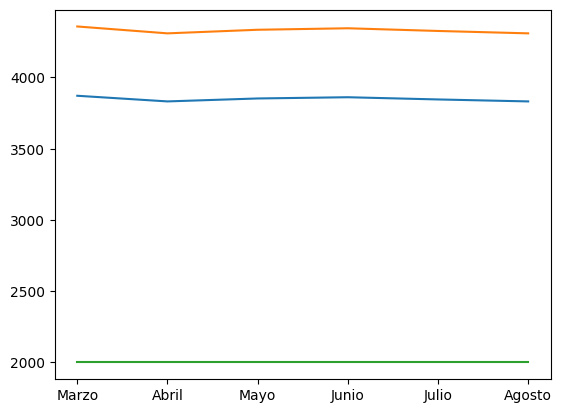

In [114]:
fig, ax = plt.subplots()
ax.plot(Fechas, TMB)
ax.plot(Fechas, C)
ax.plot(Fechas, HA)
plt.show()